In [40]:
import pandas as pd
PATH = '../../datos/datos_por_estacion/CENTRO.xlsx'
data_2021 = pd.read_excel(PATH, sheet_name='2021')
data_2022 = pd.read_excel(PATH, sheet_name='2022')
data_2023 = pd.read_excel(PATH, sheet_name='2023')
data_2024 = pd.read_excel(PATH, sheet_name='2024')
data_2025 = pd.read_excel(PATH, sheet_name='2025')

listado_dfs = [data_2021, data_2022, data_2023, data_2024, data_2025]

df = pd.concat(listado_dfs, ignore_index=True)

In [41]:
df.columns

Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'WDV'],
      dtype='object')

In [42]:
import sys
sys.path.append('..')
import imputar_datos
import importlib

importlib.reload(imputar_datos)

<module 'imputar_datos' from '/Users/marielalvarez/2025/5to_sem/multivariados/RETO/ETAPA2/centro/../imputar_datos.py'>

In [43]:

from imputar_datos import *

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df_imputed = imputar_multivariado(df)

/Users/marielalvarez/2025/5to_sem/multivariados/RETO/ETAPA2/centro/../imputar_datos.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).asfreq("H")  # asegurar frecuencia horaria


In [46]:
df_imputed.reset_index(inplace=True)


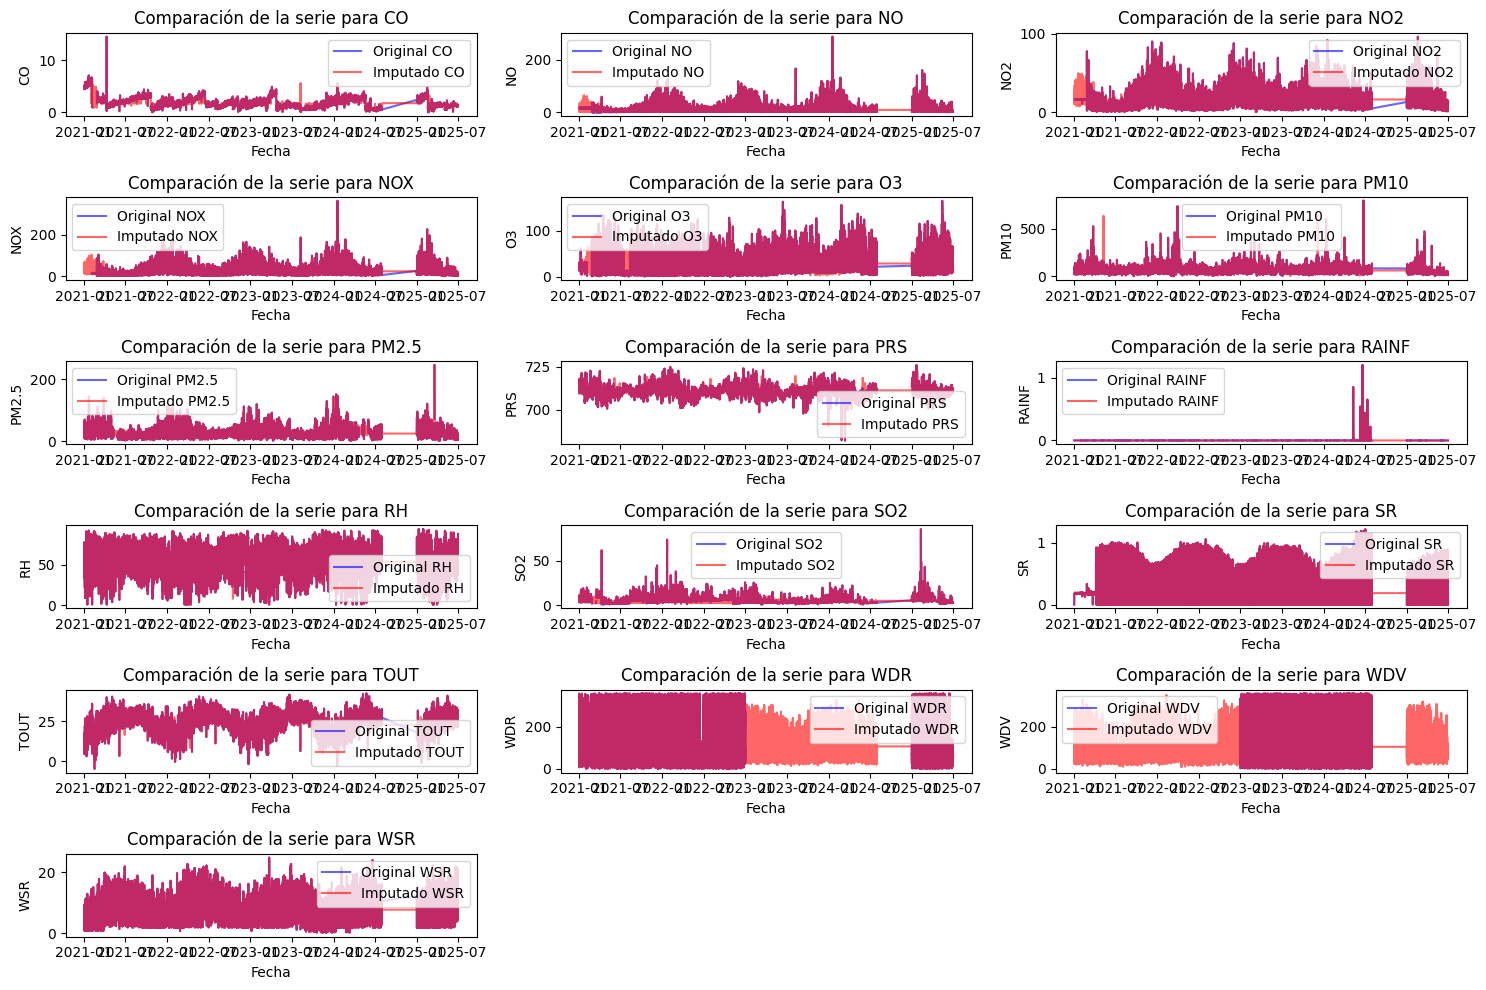

In [47]:
import matplotlib.pyplot as plt
variables = df.columns.difference(['date'])

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(len(variables)//3+1, 3, i+1)  # Crear subgráficos
    plt.plot(df['date'], df[var], label=f'Original {var}', color='blue', alpha=0.6)
    plt.plot(df_imputed['date'], df_imputed[var], label=f'Imputado {var}', color='red', alpha=0.6)
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.title(f'Comparación de la serie para {var}')
    plt.legend()

plt.tight_layout()
plt.show()

In [48]:
df_imputed.corr()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,WDV
date,1.000000,-0.274795,0.060653,0.043099,0.046143,0.079122,-0.060433,0.020380,-0.064282,0.034847,0.004009,-0.085945,-0.013573,0.043898,0.054343,-0.035236,0.033805
CO,-0.274795,1.000000,0.232129,0.212337,0.250575,-0.058188,0.196676,0.234891,-0.040167,-0.041703,0.030537,0.251069,0.015563,-0.134646,-0.161285,0.091355,0.057476
NO,0.060653,0.232129,1.000000,0.552125,0.871019,-0.274552,0.338773,0.385287,0.092262,-0.016519,0.099709,0.200093,0.001589,-0.266080,-0.333930,0.188765,0.257434
NO2,0.043099,0.212337,0.552125,1.000000,0.875017,-0.275943,0.449278,0.478532,0.090372,-0.027717,-0.006503,0.359399,-0.022388,-0.338417,-0.520252,0.261032,0.338936
NOX,0.046143,0.250575,0.871019,0.875017,1.000000,-0.324336,0.454496,0.497300,0.102880,-0.024286,0.060781,0.321114,-0.016301,-0.339572,-0.482918,0.250756,0.335170
O3,0.079122,-0.058188,-0.274552,-0.275943,-0.324336,1.000000,0.072046,-0.034830,-0.227113,-0.007612,-0.579173,0.093079,0.562192,0.499076,0.522825,-0.222102,-0.247136
PM10,-0.060433,0.196676,0.338773,0.449278,0.454496,0.072046,1.000000,0.602486,-0.139934,-0.027994,-0.230237,0.306390,0.224660,0.017413,-0.081061,0.070164,0.095624
PM2.5,0.020380,0.234891,0.385287,0.478532,0.497300,-0.034830,0.602486,1.000000,-0.150472,-0.033300,0.067556,0.248154,0.103061,-0.086598,-0.235579,0.097562,0.142469
PRS,-0.064282,-0.040167,0.092262,0.090372,0.102880,-0.227113,-0.139934,-0.150472,1.000000,-0.011231,0.186364,0.061747,-0.098128,-0.633595,-0.176263,-0.043159,-0.016513
RAINF,0.034847,-0.041703,-0.016519,-0.027717,-0.024286,-0.007612,-0.027994,-0.033300,-0.011231,1.000000,0.053491,-0.029761,-0.013142,0.000119,0.037621,-0.007941,0.013639


In [49]:
df.corr()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,WDV
date,1.000000,-0.298594,0.085956,0.086641,0.089594,0.090168,-0.068530,0.019968,-0.069860,0.038105,0.002623,-0.133073,-0.014630,0.046901,0.058555,-0.022346,-0.014615
CO,-0.298594,1.000000,0.229380,0.197984,0.247018,-0.055426,0.199893,0.246474,-0.040787,-0.041810,0.030268,0.264808,0.014687,-0.131004,-0.160295,0.070798,0.111993
NO,0.085956,0.229380,1.000000,0.542501,0.872115,-0.279007,0.329189,0.407516,0.091777,-0.017684,0.102988,0.194240,-0.013001,-0.265674,-0.331963,0.178720,0.182331
NO2,0.086641,0.197984,0.542501,1.000000,0.875340,-0.278076,0.449045,0.514885,0.087837,-0.027868,-0.005223,0.350684,-0.026504,-0.334007,-0.517347,0.245090,0.239442
NOX,0.089594,0.247018,0.872115,0.875340,1.000000,-0.323168,0.451634,0.529644,0.101211,-0.024164,0.060207,0.312765,-0.016847,-0.335725,-0.479575,0.237982,0.234446
O3,0.090168,-0.055426,-0.279007,-0.278076,-0.323168,1.000000,0.078841,-0.026111,-0.228000,-0.008188,-0.578521,0.082529,0.559794,0.506676,0.528131,-0.204841,-0.208428
PM10,-0.068530,0.199893,0.329189,0.449045,0.451634,0.078841,1.000000,0.640763,-0.140774,-0.028087,-0.226034,0.301727,0.224293,0.017415,-0.081365,0.077567,0.069271
PM2.5,0.019968,0.246474,0.407516,0.514885,0.529644,-0.026111,0.640763,1.000000,-0.159007,-0.033269,0.071894,0.269866,0.110223,-0.094897,-0.253089,0.103565,0.117390
PRS,-0.069860,-0.040787,0.091777,0.087837,0.101211,-0.228000,-0.140774,-0.159007,1.000000,-0.011276,0.181444,0.065351,-0.099202,-0.633788,-0.173696,-0.068513,-0.066227
RAINF,0.038105,-0.041810,-0.017684,-0.027868,-0.024164,-0.008188,-0.028087,-0.033269,-0.011276,1.000000,0.051745,-0.031141,-0.013414,0.000321,0.037922,NaN,0.017501


In [50]:
df_imputed.to_excel('../../datos/datos_imputados/CENTRO_IMPUTADO.xlsx', index=False)